#### Notebook 4
- Make graphics for the verification, anomaly, and score files

In [322]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import util
from matplotlib import cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Variable options

verif_type:
- monthly or seasonal

var_type:
- single or pressure

var:
- single: t2m, prec
- pressure: t, relhum, geopotential

level:
- 925, 850, False

In [335]:
verif_type = 'monthly'
var_type = 'single'
var = 'prec'
level = False
prepath = 'data/post_processed/'
unit = util.unit_map[var]

In [336]:
# for plotting purposes
if var_type == 'pressure':
    var_merged = var+str(level)
elif var_type == 'single':
    var_merged = var

In [337]:
var_merged

'prec'

In [338]:
prj_pole_lon = util.ModelProj().pole_longitude
prj_pole_lat = util.ModelProj().pole_latitude

crs_parameters = {'pole_longitude': prj_pole_lon,
                  'pole_latitude': prj_pole_lat,
                  }

In [339]:
da_pp = util.get_post_processed_verif_files(verif_type, var_type, 
                                            var, level, prepath)[var]

In [340]:
print(int(da_pp.min()) - int(da_pp.min())%10)
print(int(da_pp.max()) + (10-int(da_pp.max())%10))

-440
1020


##### Monthly Verification Graphs

Sample monthly vmin-vmax values
- prec : -200, 200 --> +50
- t2m: -10, 10 --> +2
- t-850: -10, 10 --> +2
- relhum-850: -30, 30 --> +5
- relhum-925: -30, 30 --> +5

cmap options: seismic, BrBG (mostly relhum and prec), coolwarm(mostly temp)

In [342]:
# Parameters to change (plot) -------------------
cmap = cm.get_cmap('BrBG')
vmin = -200 # consider lower limit above
vmax = 200 # upper bound consider upper limit above
thresh = 50
norm = BoundaryNorm(np.arange(vmin, vmax+thresh, thresh), ncolors=cmap.N, clip=True)
ticks = np.arange(vmin, vmax+thresh, thresh)
# -----------------------

# graphic features
fig_array = [[1,2,3],
             [4,5,6],
             [7,8,9]]

graphic_no = 9 # number of subfigures

# projection
crs_data = cartopy.crs.RotatedPole(**crs_parameters)

method='Month'
difference_method = 'Model-ERA5'

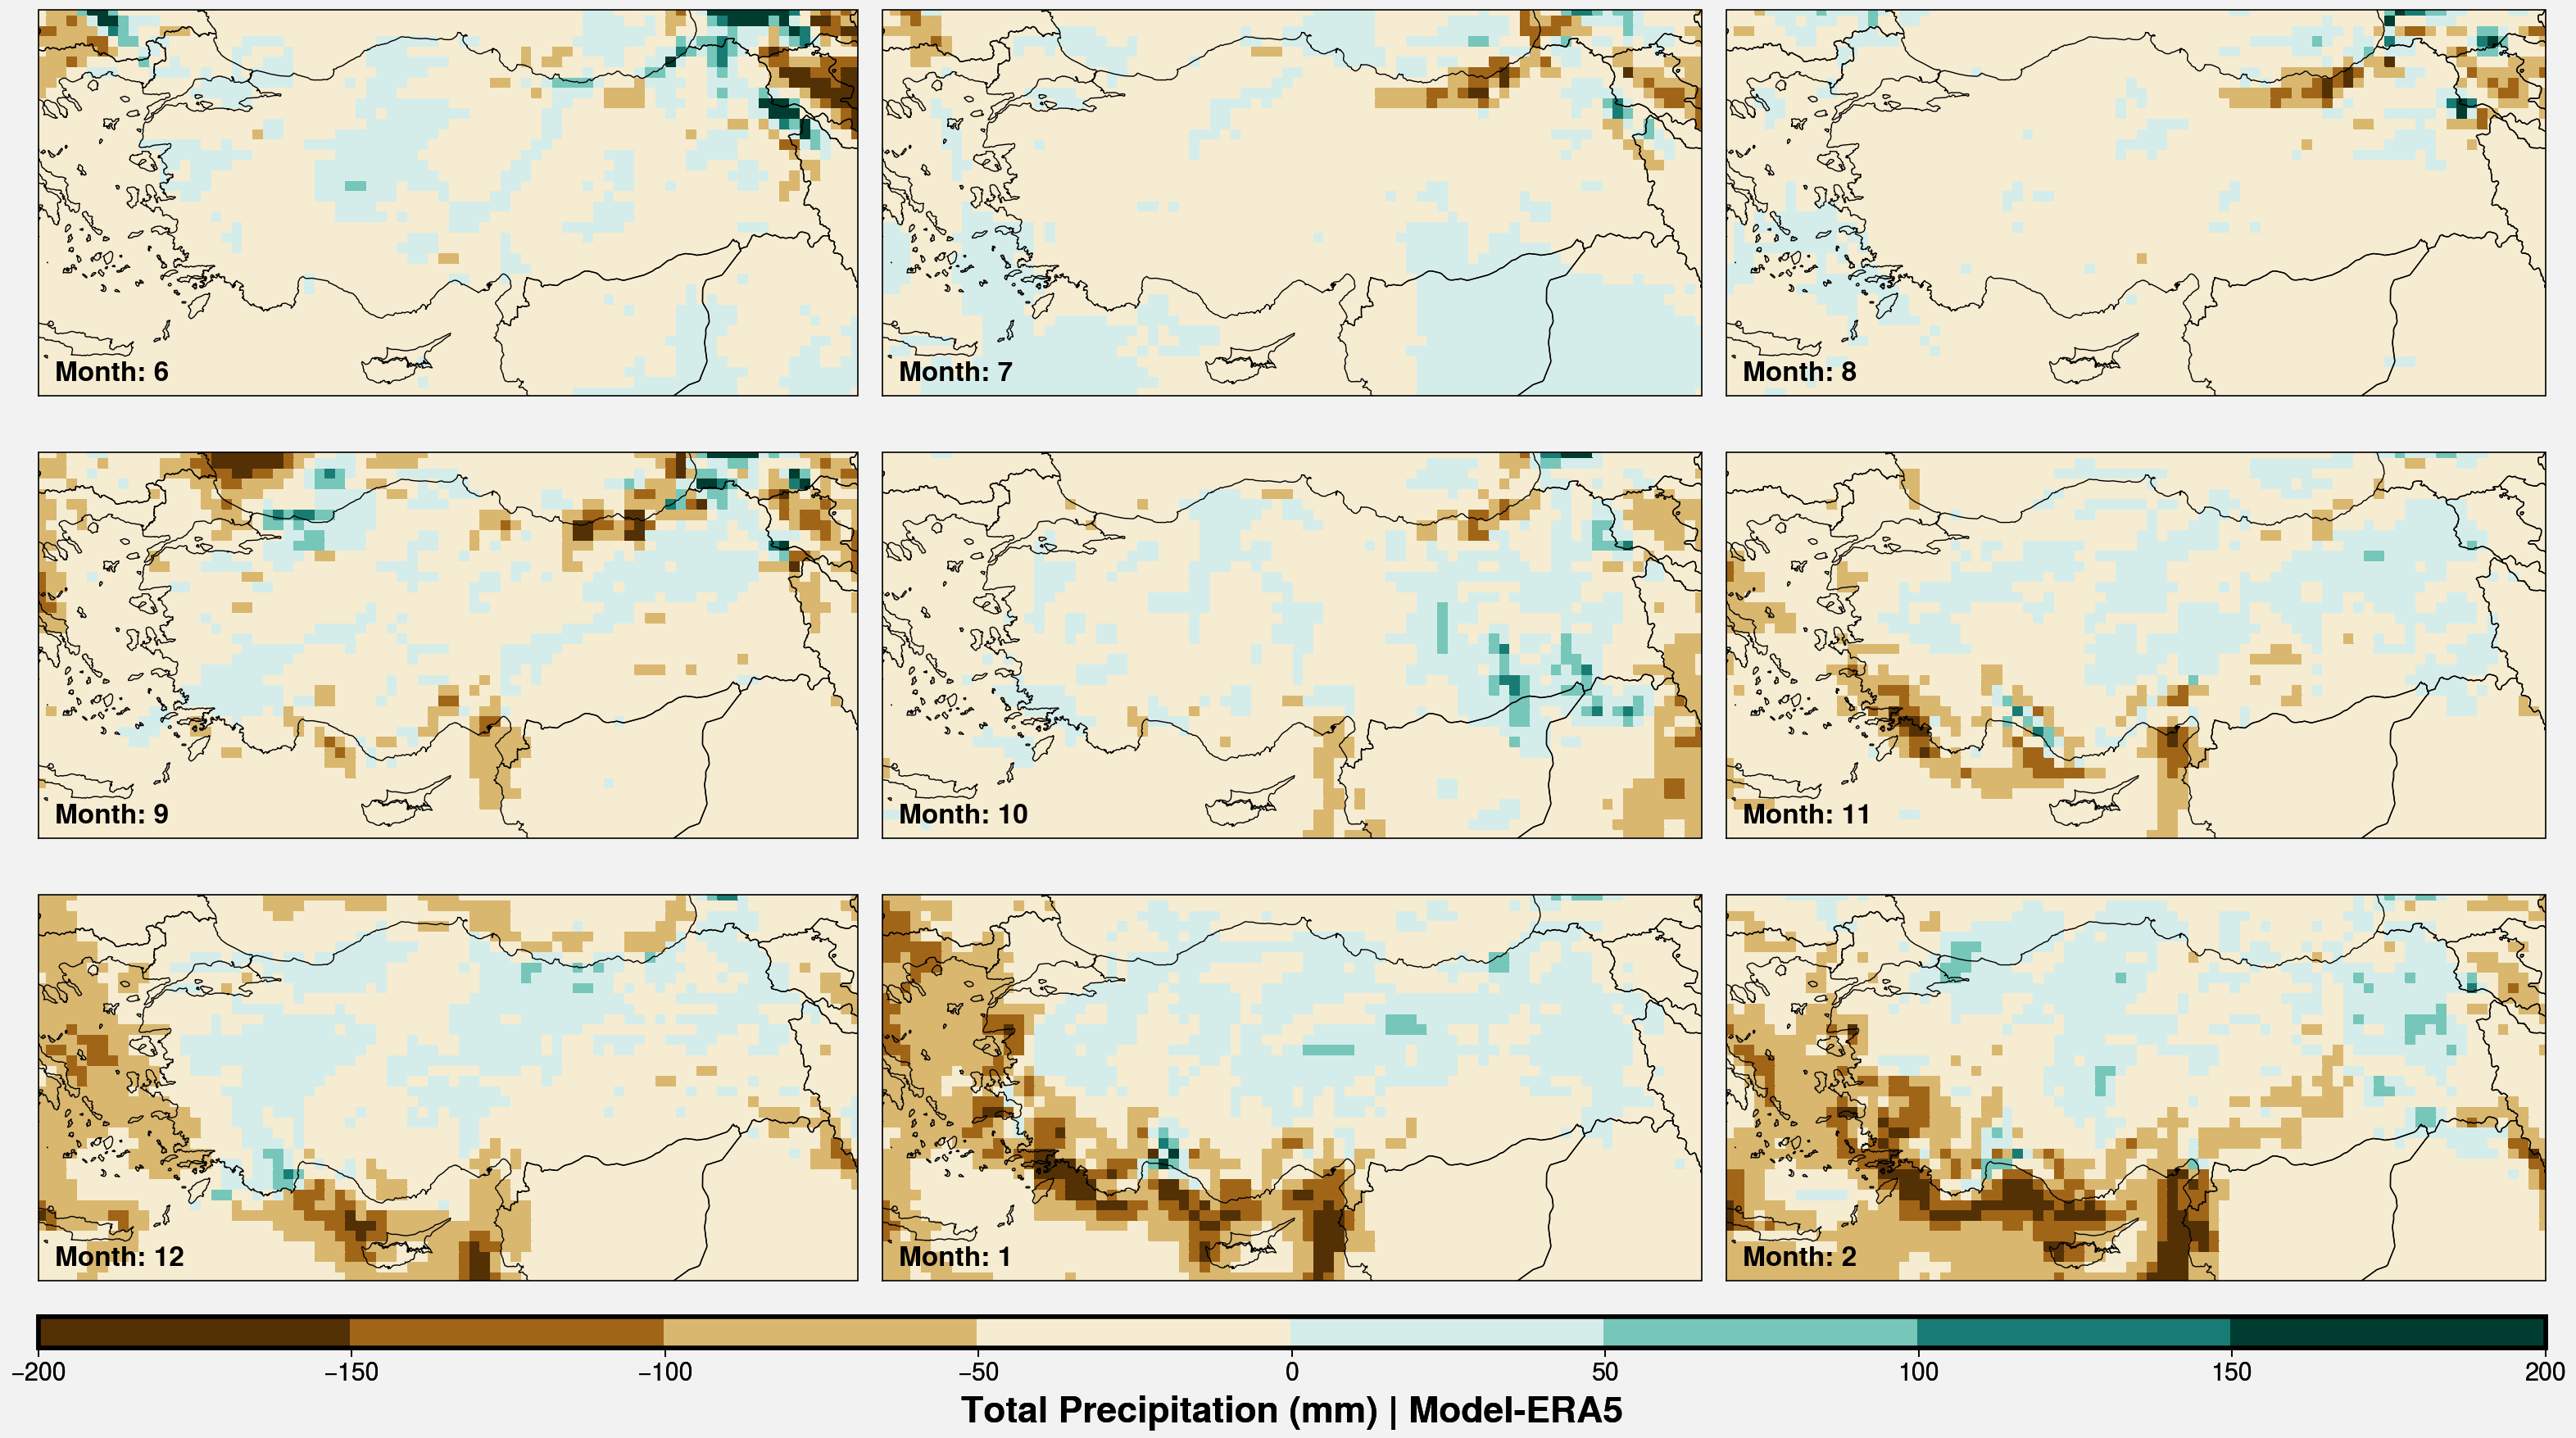

In [343]:
util.plot_verif_map(da_pp, cmap, vmin, vmax, norm, ticks,
                    crs_data, graphic_no, util.graph_field_map[var_merged], method, difference_method, fig_array, unit)

##### Seasonal Verification Graphs

Sample seasonal vmin-vmax values
- prec : -200, 200 --> +50
- t2m: -10, 10 --> +2
- t-850: -10, 10 --> +2
- relhum-850: -20, 20 --> +4
- relhum-925: -30, 30 --> +5 Verification Graphs

cmap options: seismic, BrBG (mostly relhum and prec), coolwarm(mostly temp)

In [332]:
# Parameters to change (plot) -------------------
cmap = cm.get_cmap('coolwarm')
vmin = -200 # consider lower limit above
vmax = 200 # upper bound consider upper limit above
thresh = 50
norm = BoundaryNorm(np.arange(vmin, vmax+thresh, thresh), ncolors=cmap.N, clip=True)
ticks = np.arange(vmin, vmax+thresh, thresh)
# -----------------------

# graphic features
fig_array = [[1,2,3]]

graphic_no = 3 # number of subfigures

# projection
crs_data = cartopy.crs.RotatedPole(**crs_parameters)

method='Season'
difference_method = 'Model-ERA5'

In [333]:
da_pp_sorted = da_pp.sel(season=['JJA', 'SON', 'DJF'])

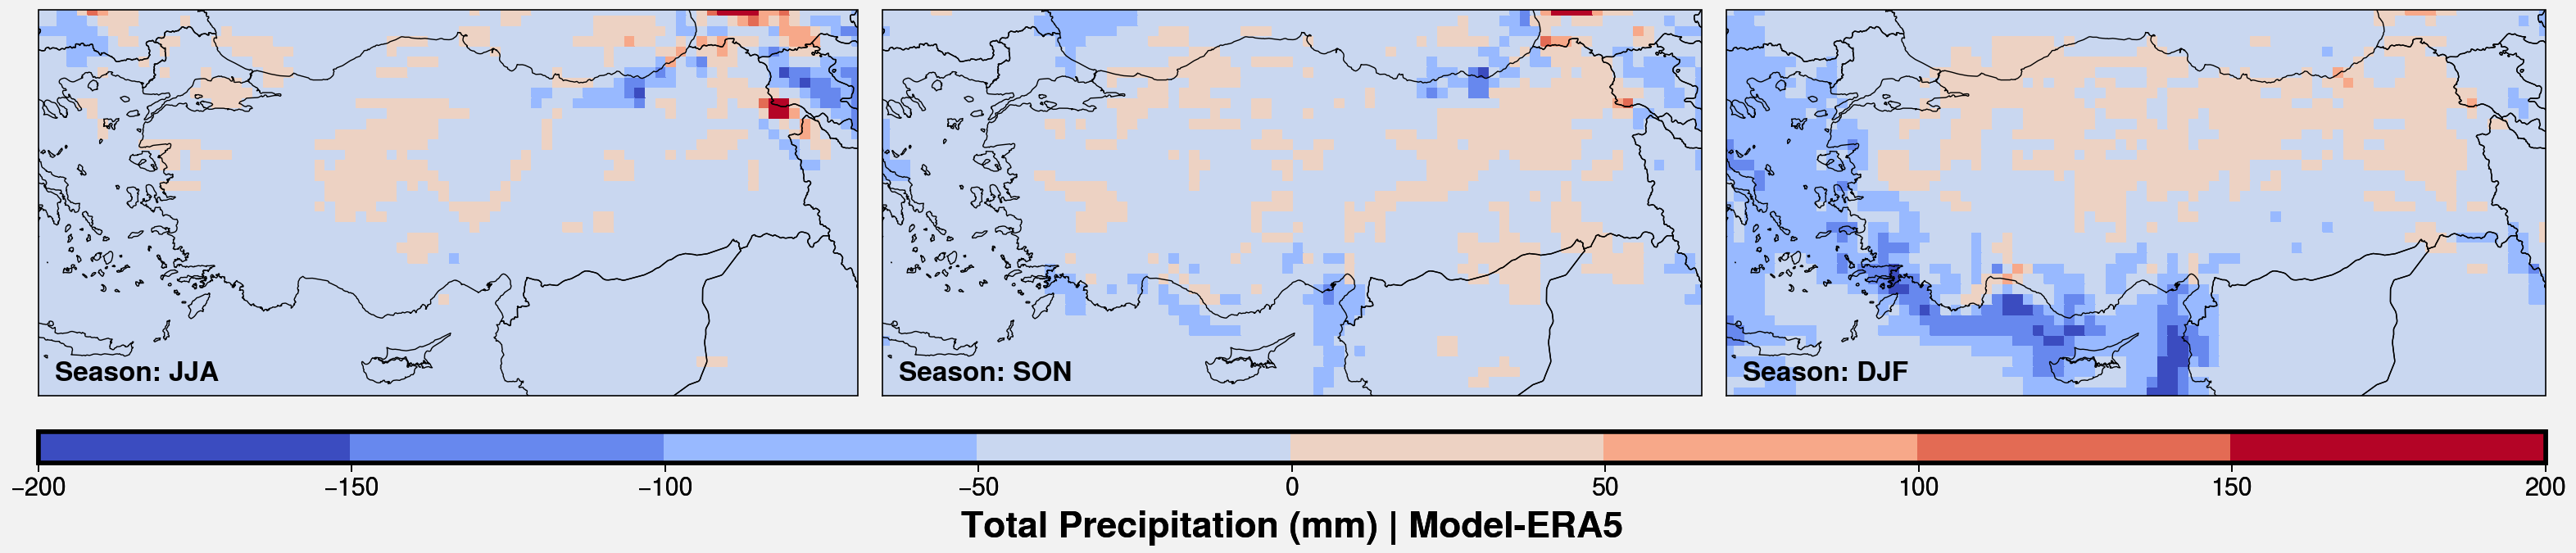

In [334]:
util.plot_verif_map(da_pp_sorted, cmap, vmin, vmax, norm, ticks,
                    crs_data, graphic_no, util.graph_field_map[var_merged], method, difference_method, fig_array, unit)

##### Scores Graphs

Sample scores vmin-vmax values
- prec : -200, 200 --> +50
- t2m: -10, 10 --> +2
- t-850: -10, 10 --> +2
- relhum-850: -20, 20 --> +4
- relhum-925: -30, 30 --> +5 Verification Graphs

In [233]:
score_pp = util.get_post_processed_score_files(var_type, var, level, prepath)

In [249]:
for i in score_pp.data_vars:
    print(i)

rmse
mae
corr


In [266]:
# Parameters to change (plot) -------------------
cmap = cm.get_cmap('summer')
vmin = 0 # consider lower limit above
vmax = 3 # upper bound consider upper limit above
thresh = 0.5
norm = BoundaryNorm(np.arange(vmin, vmax+thresh, thresh), ncolors=cmap.N, clip=True)
ticks = np.arange(vmin, vmax+thresh, thresh)
# -----------------------

# graphic features
fig_array = [[1]]

graphic_no = 1 # number of subfigures

# projection
crs_data = cartopy.crs.RotatedPole(**crs_parameters)

method='Score'
difference_method = 'Model-ERA5'

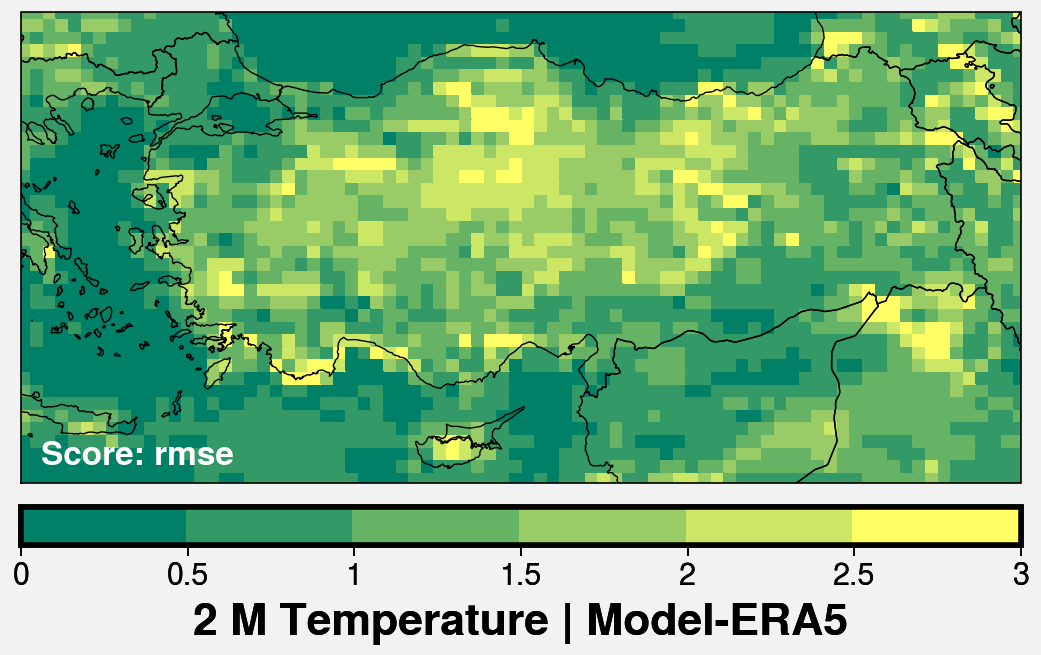

In [273]:
util.plot_score_map(score_pp, cmap, vmin, vmax, norm, ticks,
                    crs_data, graphic_no, util.graph_field_map[var_merged], method, difference_method, fig_array, unit)